In [44]:
import numpy as np
import pandas as pd



In [45]:
df=pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df[['target']]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 67)

In [49]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [50]:
y_train

,target
241,0
199,0
13,1
230,0
58,1
...,...
291,0
22,1
35,1
7,1


In [51]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3


In [52]:
y_test

,target
211,0
242,0
192,0
24,1
231,0
...,...
302,0
75,1
145,1
273,0


In [53]:
# for Random forest
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [68]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7868852459016393


C:\Users\Smile\AppData\Local\Temp\ipykernel_30908\3851375449.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


In [69]:
#for decision tree classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state= 67)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7704918032786885


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6065573770491803


C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [71]:
from sklearn.model_selection import cross_val_score


# Assuming you have features (X) and labels (y)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the hyperparameters

# Perform 5-fold cross-validation (adjust cv parameter as needed)
knn_scores = cross_val_score(knn_model, x
                             , y, cv=3, scoring='accuracy')

# Get the mean accuracy
knn_mean_accuracy = knn_scores.mean()

print(f"KNN Mean Accuracy: {knn_mean_accuracy}")


# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)  # You can adjust the hyperparameters
rf_scores = cross_val_score(rf_model, x, y, cv=5, scoring='accuracy')
rf_mean_accuracy = rf_scores.mean()
print(f"Random Forest Mean Accuracy: {rf_mean_accuracy}")

# Decision Tree
dt_model = DecisionTreeClassifier()  # You can adjust the hyperparameters
dt_scores = cross_val_score(dt_model, x, y, cv=5, scoring='accuracy')
dt_mean_accuracy = dt_scores.mean()
print(f"Decision Tree Mean Accuracy: {dt_mean_accuracy}")


C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686

KNN Mean Accuracy: 0.6303630363036303


C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Smile\AppData\Local\Programs\Py

Random Forest Mean Accuracy: 0.8348087431693989
Decision Tree Mean Accuracy: 0.7457377049180328


In [72]:
#predictive system
input_data =(53,1,4,142,226,0,2,111,1,0,1,0,7)
input_data_as_numpy_array =np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("Heart Disease is present")
else:
    if (prediction[0]==1):
         print("Heart Disease is not present")


[0]
Heart Disease is present


C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
# 57	0	0	120	354	0	1	163	1	0.6	2	0	2	1
#predictive system
input_data =(57,0,0,120,348,0,1,163,1,0.6,2,0,2)
input_data_as_numpy_array =np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("Heart Disease is present")
else:
    if (prediction[0]==1):
         print("Heart Disease is not present")


[1]
Heart Disease is not present


C:\Users\Smile\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [74]:
import matplotlib.pyplot as plt

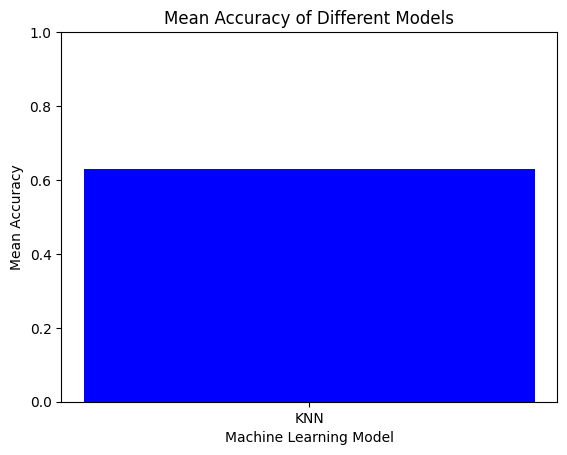

In [75]:
# Mean accuracy values for KNN
mean_accuracies = [knn_mean_accuracy]

# Model names
models = ['KNN']

# Create a bar graph
plt.bar(models, mean_accuracies, color='blue')
plt.xlabel('Machine Learning Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Display the graph
plt.show()

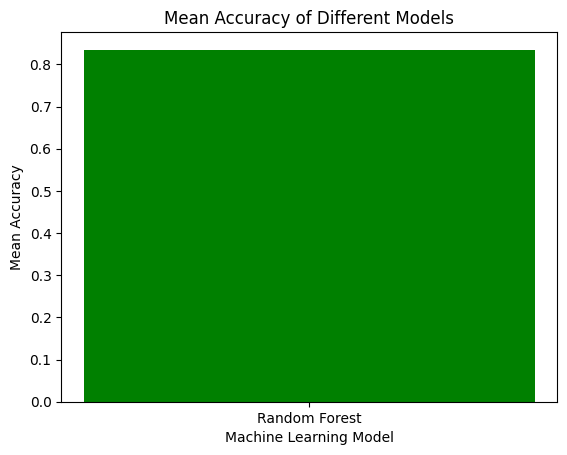

In [76]:
# Mean accuracy values for  Random Forest
mean_accuracies = [knn_mean_accuracy, rf_mean_accuracy, dt_mean_accuracy]

# Model names
models = [ 'Random Forest']

# Create a bar graph
plt.bar(models, mean_accuracies, color='green')
plt.xlabel('Machine Learning Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0)  # Set the y-axis range from 0 to 1

# Display the graph
plt.show()

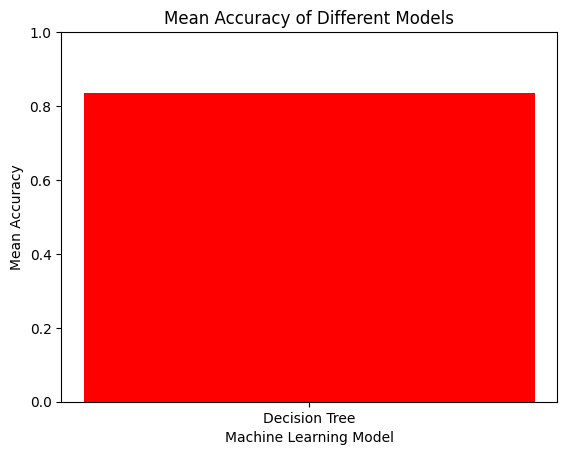

In [77]:
# Mean accuracy values for Decision Tree
mean_accuracies = [knn_mean_accuracy, rf_mean_accuracy, dt_mean_accuracy]

# Model names
models = ['Decision Tree']
accuracies = [dt_mean_accuracy]

# Create a bar graph
plt.bar(models, mean_accuracies, color='red')
plt.xlabel('Machine Learning Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Display the graph
plt.show()

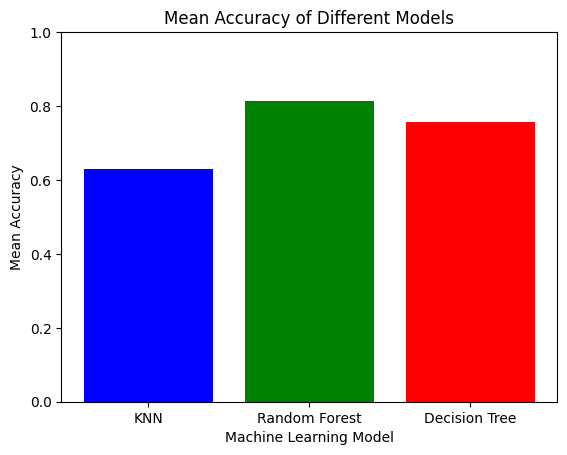

In [65]:
# Mean accuracy values for KNN, Random Forest, and Decision Tree
mean_accuracies = [knn_mean_accuracy, rf_mean_accuracy, dt_mean_accuracy]

# Model names
models = ['KNN', 'Random Forest', 'Decision Tree']
accuracies = [knn_mean_accuracy, rf_mean_accuracy, dt_mean_accuracy]

# Create a bar graph
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Display the graph
plt.show()